In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [31]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [32]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [33]:
data.shape

(205, 7)

In [34]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

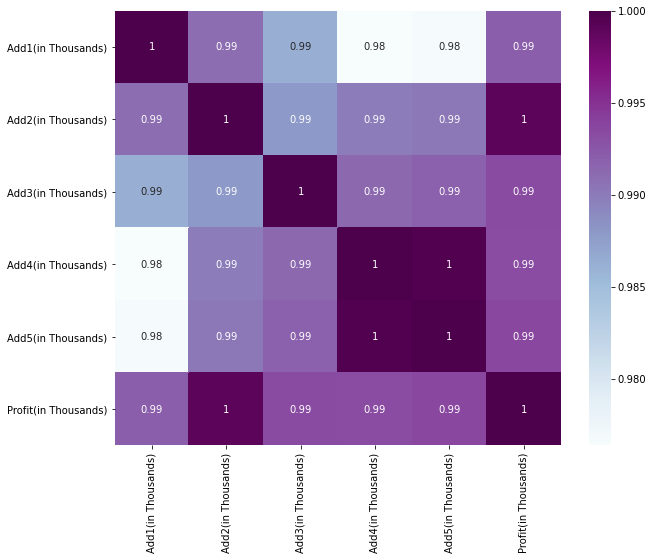

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='BuPu',annot=True);

There is a high correlation between add2 and profit.

In [36]:
data1=data.drop('Date',axis=1)
data1.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [37]:
X=data1.drop(['Profit(in Thousands)'],axis=1)
X.head()
X.shape

(205, 5)

In [38]:
Y=data1['Profit(in Thousands)']
Y.head()
Y.shape

(205,)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.20,random_state=40)

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (164, 5)
x_test: (41, 5)
y_train: (164,)
y_test: (41,)


In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_predicted=model.predict(x_test)
y_predicted

array([5395.217, 4404.686, 4898.776, 4419.421, 5903.253, 5027.633,
       5238.366, 5247.011, 5030.451, 5318.1  , 5134.657, 5861.83 ,
       4647.356, 4451.999, 5780.799, 5111.806, 5212.949, 4465.95 ,
       5187.445, 4480.363, 4671.113, 4416.136, 5131.898, 4648.834,
       5616.791, 4915.682, 4190.965, 5577.15 , 5153.977, 5163.322,
       4513.6  , 4558.651, 5789.791, 4887.296, 4435.571, 5728.804,
       5250.15 , 5190.814, 5239.06 , 5146.949, 4997.719])

116    5395.217
5      4404.686
89     4898.776
35     4419.421
185    5903.253
81     5027.633
123    5238.366
138    5247.011
69     5030.451
118    5318.100
143    5134.657
186    5861.830
96     4647.356
26     4451.999
191    5780.799
144    5111.806
161    5212.949
23     4465.950
77     5187.445
37     4480.363
54     4671.113
28     4416.136
100    5131.898
97     4648.834
168    5616.791
136    4915.682
18     4190.965
109    5577.150
125    5153.977
142    5163.322
33     4513.600
46     4558.651
172    5789.791
90     4887.296
11     4435.571
170    5728.804
140    5250.150
59     5190.814
64     5239.060
151    5146.949
164    4997.719
Name: Profit(in Thousands), dtype: float64

In [49]:
model.score(x_test,y_test)

1.0

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

7.263049280953414e-25

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

1.0

All of the predicted value is same as the actual value with a r2 score of 100.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [50]:
model.predict(np.array([[290,312,309,298,320]]))

array([5820.06])

The profit given by given sales is 5820.06